# **Data Cleansing Exploration** -- Berliani Larasati

---

# **Introduction**

- In this notebook, the focus will be on exploring a marketing dataset to extract insights from various marketing metrics. The dataset used is `bank-additional-full-alt.csv`, which can be obtained from the following website: [Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing).



# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

These variables are going to be the main focus to calculate customer engagement:
  
  1. `contact`:
    - Represents the contact communication type, such as cellular, telephone, or unknown. It captures the method of contact made by the bank to engage with customers.
  
  2. `month`:
    - Indicates the month of the last contact with the customer. It provides information on the timing of the engagement.
  
  3. `day_of_week`:
    - Represents the day of the week of the last contact. It offers insights into the specific days when customers were engaged.

# **Import Data**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/binggas/public-dataset/main/bank%2Bmarketing/bank-additional/bank-additional-full-alt.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
pd.set_option('display.max_columns', None)

# **Part 01: Data Cleaning & Pre-processing**

# **Check for Duplicates**

In [ ]:
# find duplicates
df.duplicated().sum()

12

In [ ]:
# find duplicates based on columns combination: "age", "job", "education", "housing", "loan"
df.duplicated(subset=['age','job','education','housing','loan']).sum()

34257

In [ ]:
# take a peek on the duplicate case
df[df.duplicated(subset=['age','job','education','housing','loan'])].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
16,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,312,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,386,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
86,41,management,married,basic.6y,no,no,no,telephone,may,mon,529,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# take one value combination and take a peek at the data
df[(df["age"]==41) &\
   (df["job"]== "blue-collar") &\
   (df["marital"]== "married") &\
   (df["education"]== "unknown") &\
   (df["housing"]== "no") &\
   (df["loan"]== "no")
   ]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8005,41,blue-collar,married,unknown,no,no,no,telephone,jun,mon,424,2,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
12180,41,blue-collar,married,unknown,no,no,no,telephone,jul,tue,529,1,999,0,nonexistent,1.4,93.918,-42.7,4.955,5228.1,no
12533,41,blue-collar,married,unknown,no,no,no,cellular,jul,mon,226,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
12959,41,blue-collar,married,unknown,no,no,no,cellular,jul,tue,89,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14891,41,blue-collar,married,unknown,unknown,no,no,cellular,jul,wed,516,4,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
29174,41,blue-collar,married,unknown,unknown,no,no,cellular,apr,fri,203,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no


- There does not seem to be any duplication that would be harmful for analysis. For now, it can proceed to the next step.

# **Check Unique Values**

In [ ]:
# check unique values of 'contact' column
print(df['contact'].unique())

['telephone' 'cellular']


In [ ]:
# value counts
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [ ]:
# check unique values of 'month' column
print(df['month'].unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


In [ ]:
# value counts
df['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [ ]:
# check unique values of 'day_of_week' column
print(df['day_of_week'].unique())

['mon' 'tue' 'wed' 'thu' 'fri']


In [ ]:
# value counts
df['day_of_week'].value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [ ]:
# check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

# **Checking for Outliers**
* Stakeholders inform that it is need to check if it is need to exclude outliers based on age. To do this, it is need to explore the distribution of the `age` column.

In [ ]:
# get quick statistic of the column 'age'
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [ ]:
# get the average value
print("average : ", np.mean(df["age"]))

# get the 5th, 50th, and 95th percentile value
print("5th percentile : ", np.percentile(df["age"], 5))
print("50th percentile : ", np.percentile(df["age"], 50))
print("95th percentile : ", np.percentile(df["age"], 95))

average :  40.02406040594348
5th percentile :  26.0
50th percentile :  38.0
95th percentile :  58.0


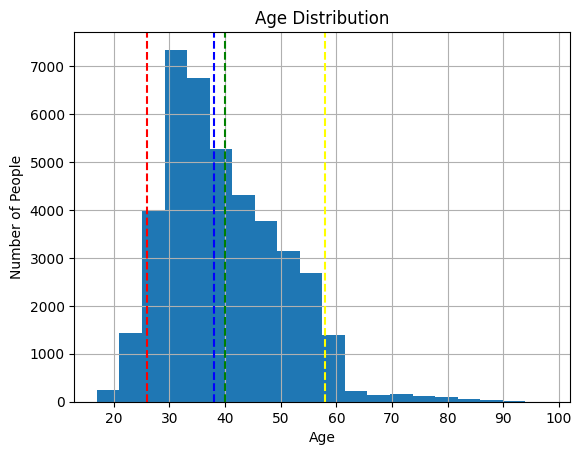

In [ ]:
# create histogram for the `age` column

fig, ax =  plt.subplots()

df['age'].hist(bins=20)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')

# put a line for average value
ax.axvline(x=np.mean(df["age"]), c="green", linestyle="--")

# put a line for 5th, 50th, and 95th percentile value
ax.axvline(x=np.percentile(df["age"], 5), c="red", linestyle="--")
ax.axvline(x=np.percentile(df["age"], 50), c="blue", linestyle="--")
ax.axvline(x=np.percentile(df["age"], 95), c="yellow", linestyle="--")


plt.show()

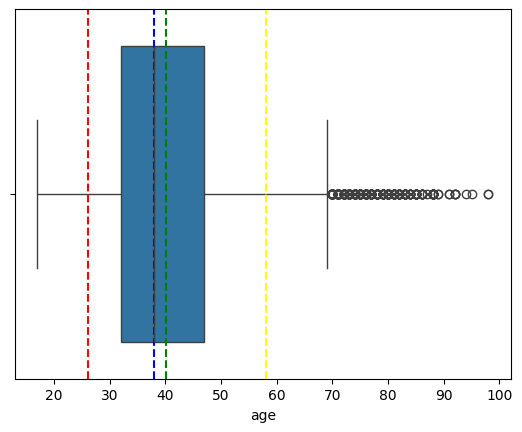

In [ ]:
# Create boxplot for the `age` column

fig, ax =  plt.subplots()

sns.boxplot(data = df,
         x="age"
         )

# Put a line for average value
ax.axvline(x=np.mean(df["age"]), c="green", linestyle="--")

# Put a line for 5th, and 95th percentile value
ax.axvline(x=np.percentile(df["age"], 5), c="red", linestyle="--")
ax.axvline(x=np.percentile(df["age"], 50), c="blue", linestyle="--")
ax.axvline(x=np.percentile(df["age"], 95), c="yellow", linestyle="--")


plt.show()

- It does not seem like there is any proof that the outlier will interfere with our analysis since:
  1. The outlier is not skewing the data distribution too much. This can be seen by comparing the median and average value. For a more exact confirmation for this, you can further check the skewness value.
  2. There are a lot of outliers, but the moajority of the data can still be considered to be distributed normally. We might lose important information if we decide to filter out the outliers.

# **Adding Customer ID**

- Now let's make a unique identifier for each customer.


- In the bank marketing dataset, each row represents one instance of a contact made with a customer rather than one customer ID.

- Therefore, there can be multiple rows with the same customer ID, indicating multiple contacts made with the same customer.

- The customer ID is not explicitly mentioned, you need to create it on your own.

- To create a unique identifier for each customer can use a combination of `age`, `job`, `marital`, `education`, `housing`, and `loan` columns.

In [ ]:
# add customer ID

df["customer_id"] = df["age"].astype(str) + '_' + df["job"].astype(str) + '_' + df["marital"].astype(str) + '_' + \
                      df["education"].astype(str) + '_' + df["housing"].astype(str) + '_' + df["loan"]
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,customer_id
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56_housemaid_married_basic.4y_no_no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,57_services_married_high.school_no_no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,37_services_married_high.school_yes_no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40_admin._married_basic.6y_no_no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56_services_married_high.school_no_yes


In [ ]:
# unique customer_id
df["customer_id"].nunique()

10469

# **Part 02: Calculate Engagement Metrics**

Relevant variables for analysis
1. `contact`: The contact communication type (e.g., cellular, telephone).
2. `month`: The month of the last contact with the customer.
3. `day_of_week`: The day of the week of the last contact.
4. `duration`: The duration of the last contact in seconds.
5. `campaign`: The number of contacts performed as part of a specific marketing campaign for the customer.
6. `previous`: The number of contacts made with the customer before the current campaign.
7. `poutcome`: The outcome of the previous marketing campaign (e.g., success, failure, unknown).
8. `education`: The customer's education level.
9. `job`: The customer's occupation or job category.
10. `age`: The customer's age.
11. `marital`: The customer's marital status.
12. `housing`: The type of housing the customer has (e.g., own, rent, unknown).

# **Contact Frequency**


In [ ]:
# group by `customer_id` and `contact`
channel_usage_freq = df.groupby(["customer_id", "contact"]).size()

# rename column to be called `count`
channel_usage_freq = pd.DataFrame(channel_usage_freq).rename(columns={0:"count"})

# sort values descending by the `count` column
channel_usage_freq.sort_values(by = "count", ascending=False, inplace=True)

# show the top 5 data
channel_usage_freq.head()

,,count
customer_id,contact,
29_admin._single_university.degree_yes_no,cellular,92
31_admin._single_university.degree_yes_no,cellular,84
30_admin._single_university.degree_no_no,cellular,73
32_admin._single_university.degree_yes_no,cellular,73
30_admin._single_university.degree_yes_no,cellular,72


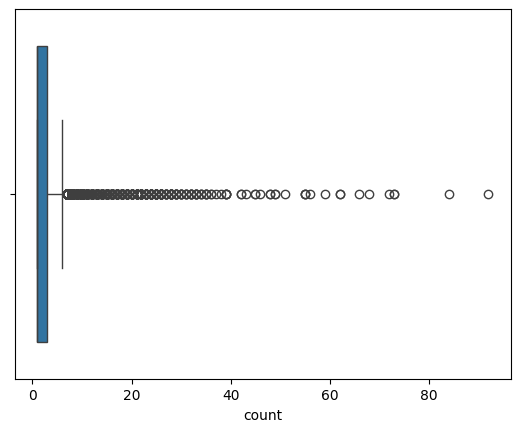

In [ ]:
sns.boxplot(data = channel_usage_freq,
            x="count"
            )

plt.show()

In [ ]:
# group by `customer_id`
contact_frequency = df.groupby(["customer_id"]).size()

# rename column to be called `count`
contact_frequency = pd.DataFrame(contact_frequency).rename(columns={0:"count"})

# sort values descending by the `count` column
contact_frequency.sort_values(by = "count", ascending=False)

,count
customer_id,
29_admin._single_university.degree_yes_no,114
31_admin._single_university.degree_yes_no,101
32_admin._single_university.degree_yes_no,92
32_admin._single_university.degree_no_no,89
29_admin._single_university.degree_no_no,88
...,...
40_technician_married_high.school_yes_yes,1
40_technician_married_basic.9y_no_yes,1
40_technician_married_basic.4y_yes_no,1


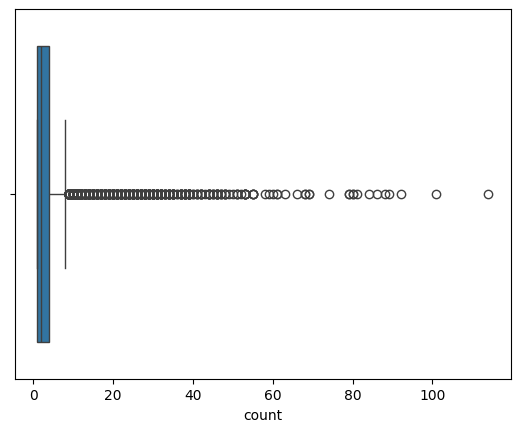

In [ ]:
sns.boxplot(data = contact_frequency,
            x="count"
            )

plt.show()

# **Duration of Contact**

In [ ]:
# group by `customer_id`
duration_of_contact = df.groupby(["customer_id"]).agg({"duration":["sum", "mean"]})


# show the top 5 data
duration_of_contact.head()

duration       
                                                sum   mean
customer_id                                               
17_student_single_basic.9y_unknown_unknown      498  498.0
17_student_single_basic.9y_yes_no               274  137.0
17_student_single_unknown_no_yes                896  896.0
17_student_single_unknown_yes_no                432  432.0
18_student_single_basic.4y_no_no                108  108.0

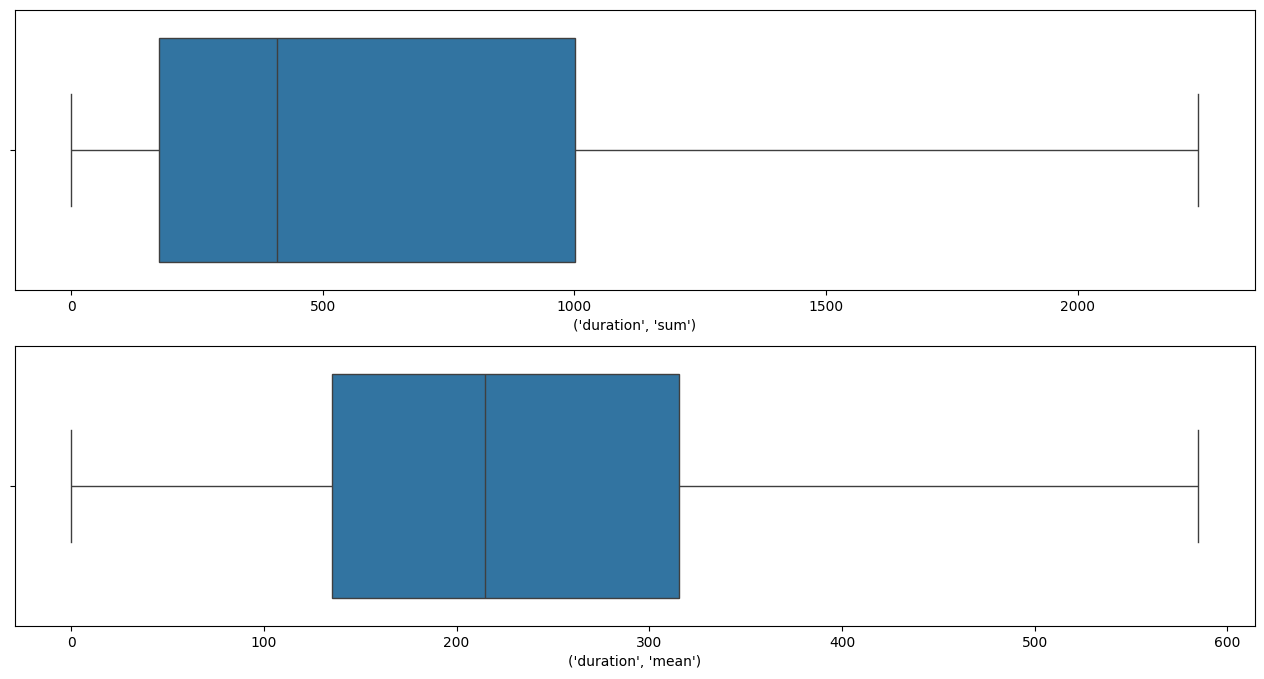

In [ ]:
fig, ax = plt.subplots(figsize=(16,8), nrows=2)

# create 1st plot
sns.boxplot(data = duration_of_contact,
            x = ("duration","sum"), # pay attention to the multiindex column
            ax=ax[0],
            showfliers = False
            )

# create 2nd plot
sns.boxplot(data = duration_of_contact,
            x = ("duration","mean"),
            ax=ax[1],
            showfliers = False
            )

plt.show()

# **Most Frequent Contact**

In [ ]:
# reset index if needed
channel_usage_freq.reset_index(inplace=True)

# create a column called `rank` using dense rank
channel_usage_freq['rank'] = channel_usage_freq.groupby(["customer_id"])["count"].rank(method='dense', ascending=False).astype(int)
channel_usage_freq

,customer_id,contact,count,rank
0,29_admin._single_university.degree_yes_no,cellular,92,1
1,31_admin._single_university.degree_yes_no,cellular,84,1
2,30_admin._single_university.degree_no_no,cellular,73,1
3,32_admin._single_university.degree_yes_no,cellular,73,1
4,30_admin._single_university.degree_yes_no,cellular,72,1
...,...,...,...,...
14005,39_services_divorced_basic.6y_no_no,telephone,1,1
14006,39_services_divorced_basic.9y_no_no,telephone,1,1
14007,39_services_divorced_professional.course_yes_yes,cellular,1,1
14008,39_services_divorced_unknown_yes_no,cellular,1,1


In [ ]:
# Check for one `customer_id`

channel_usage_freq[channel_usage_freq["customer_id"]=='18_student_single_unknown_no_no']

,customer_id,contact,count,rank
6443,18_student_single_unknown_no_no,telephone,2,1
10887,18_student_single_unknown_no_no,cellular,1,2


In [ ]:
channel_usage_freq_ranked = channel_usage_freq[channel_usage_freq["rank"] == 1].copy()
channel_usage_freq_ranked.head()

,customer_id,contact,count,rank
0,29_admin._single_university.degree_yes_no,cellular,92,1
1,31_admin._single_university.degree_yes_no,cellular,84,1
2,30_admin._single_university.degree_no_no,cellular,73,1
3,32_admin._single_university.degree_yes_no,cellular,73,1
4,30_admin._single_university.degree_yes_no,cellular,72,1


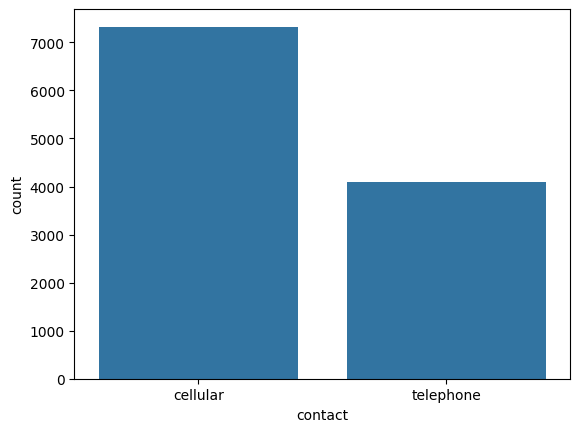

In [ ]:
# show frquency of each value in the `contact` column
sns.countplot(data = channel_usage_freq_ranked,
              x= "contact"
              )

# show the graph
plt.show()

# **Campaign Conversation Rate**

In [ ]:
# find unique customer_id per campaign
campaign_unique_cust = df.groupby(["campaign"]).agg({"customer_id":"nunique"})


# properly rename the result column to be `unique_cust_cnt`
campaign_unique_cust = campaign_unique_cust.rename(columns={"customer_id": "unique_cust_cnt"})


# Check first 5 data
campaign_unique_cust.head()

,unique_cust_cnt
campaign,
1,6565
2,4973
3,3153
4,1928
5,1252


In [ ]:
# find unique customer_id per campaign and y
campaign_respond_unique_cust = df.groupby(["campaign", "y"]).agg({"customer_id":"nunique"})

# properly rename the result column to be `unique_respond_cust_cnt`
campaign_respond_unique_cust = campaign_respond_unique_cust.rename(columns={"customer_id": "unique_respond_cust_cnt"})

# Check first 5 data
campaign_respond_unique_cust.head()

unique_respond_cust_cnt
campaign y                           
1        no                      6002
         yes                     1645
2        no                      4580
         yes                      994
3        no                      2915

In [ ]:
# Merge campaign_respond_unique_cust and campaign_unique_cust by the index
campaign_conv_rate = campaign_respond_unique_cust.merge(campaign_unique_cust, left_index=True, right_index=True)

# Check first 5 data
campaign_conv_rate.head()

unique_respond_cust_cnt  unique_cust_cnt
campaign y                                            
1        no                      6002             6565
         yes                     1645             6565
2        no                      4580             4973
         yes                      994             4973
3        no                      2915             3153

In [ ]:
# Create new DataFrame to keep the old DataFrame save. But only get the rows where `y = yes`
campaign_conv_rate_responded = campaign_conv_rate.loc[(slice(None),"yes"),:].copy()


# rename the columns
campaign_conv_rate_responded.rename(columns={"unique_respond_cust_cnt":"responded_customer",
                                             "unique_cust_cnt":"total_customer"
                                             }, inplace=True)

# get conversion rate
campaign_conv_rate_responded["campaign_conversion_rate"] = campaign_conv_rate_responded["responded_customer"] / campaign_conv_rate_responded["total_customer"]

# show result
campaign_conv_rate_responded.head()

,,responded_customer,total_customer,campaign_conversion_rate
campaign,y,,,
1,yes,1645,6565,0.250571
2,yes,994,4973,0.199879
3,yes,511,3153,0.162068
4,yes,241,1928,0.125000
5,yes,117,1252,0.093450


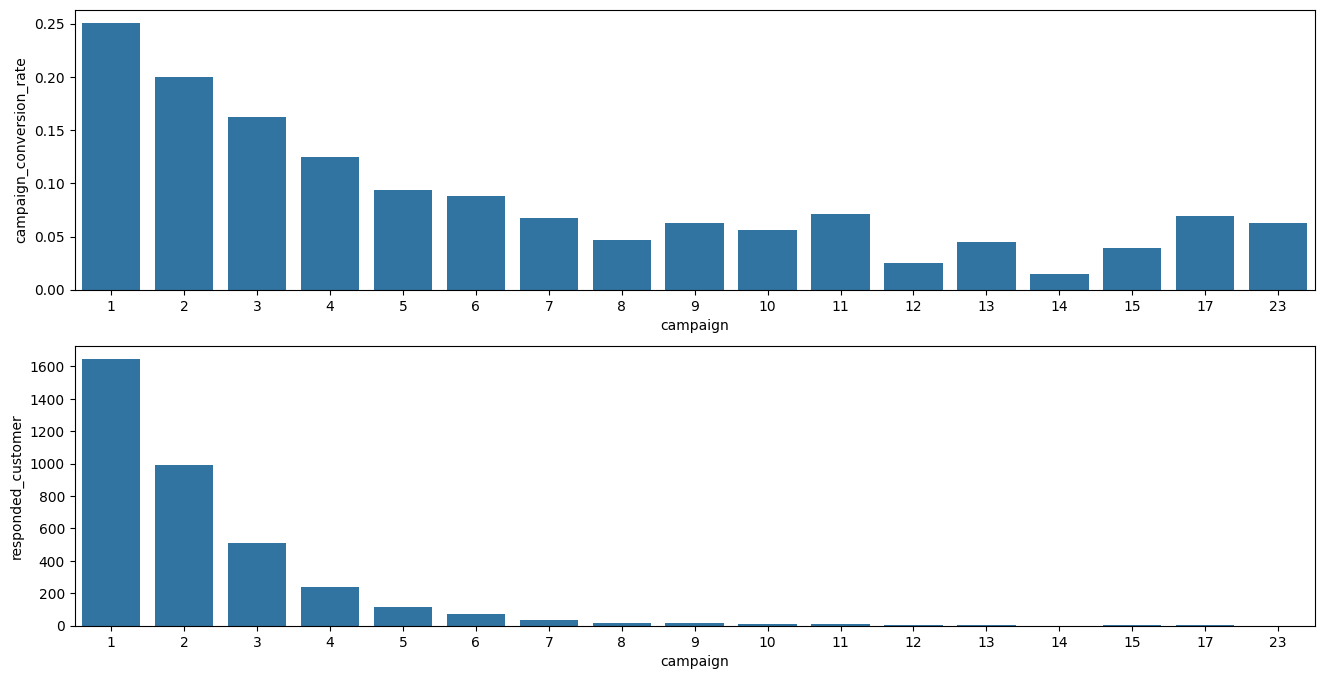

In [ ]:
fig, ax = plt.subplots(figsize=(16,8), nrows=2)

sns.barplot(data = campaign_conv_rate_responded.reset_index(),
            x = "campaign",
            y = "campaign_conversion_rate",
            ax = ax[0]
            )

sns.barplot(data = campaign_conv_rate_responded.reset_index(),
            x = "campaign",
            y = "responded_customer",
            ax = ax[1]
            )

plt.show()

# **Campaign Engagement**

In [ ]:
# find number of row per customer_id per campaign and y
campaign_engagement = pd.DataFrame(df.groupby(["customer_id", "campaign"]).size())

# properly rename the result column to be `count`
campaign_engagement.rename(columns={0:"count"}, inplace=True)

# reset index
campaign_engagement.reset_index(inplace=True)

# sort values by `count`
campaign_engagement.sort_values(by="count", ascending=False)

,customer_id,campaign,count
2382,29_admin._single_university.degree_yes_no,1,54
3719,31_admin._single_university.degree_yes_no,1,49
2973,30_admin._single_university.degree_no_no,1,44
2986,30_admin._single_university.degree_yes_no,1,43
5887,34_admin._married_university.degree_no_no,1,40
...,...,...,...
8578,37_services_divorced_high.school_yes_yes,4,1
8579,37_services_divorced_professional.course_no_no,2,1
8580,37_services_married_basic.6y_no_no,4,1
8582,37_services_married_basic.9y_no_no,2,1


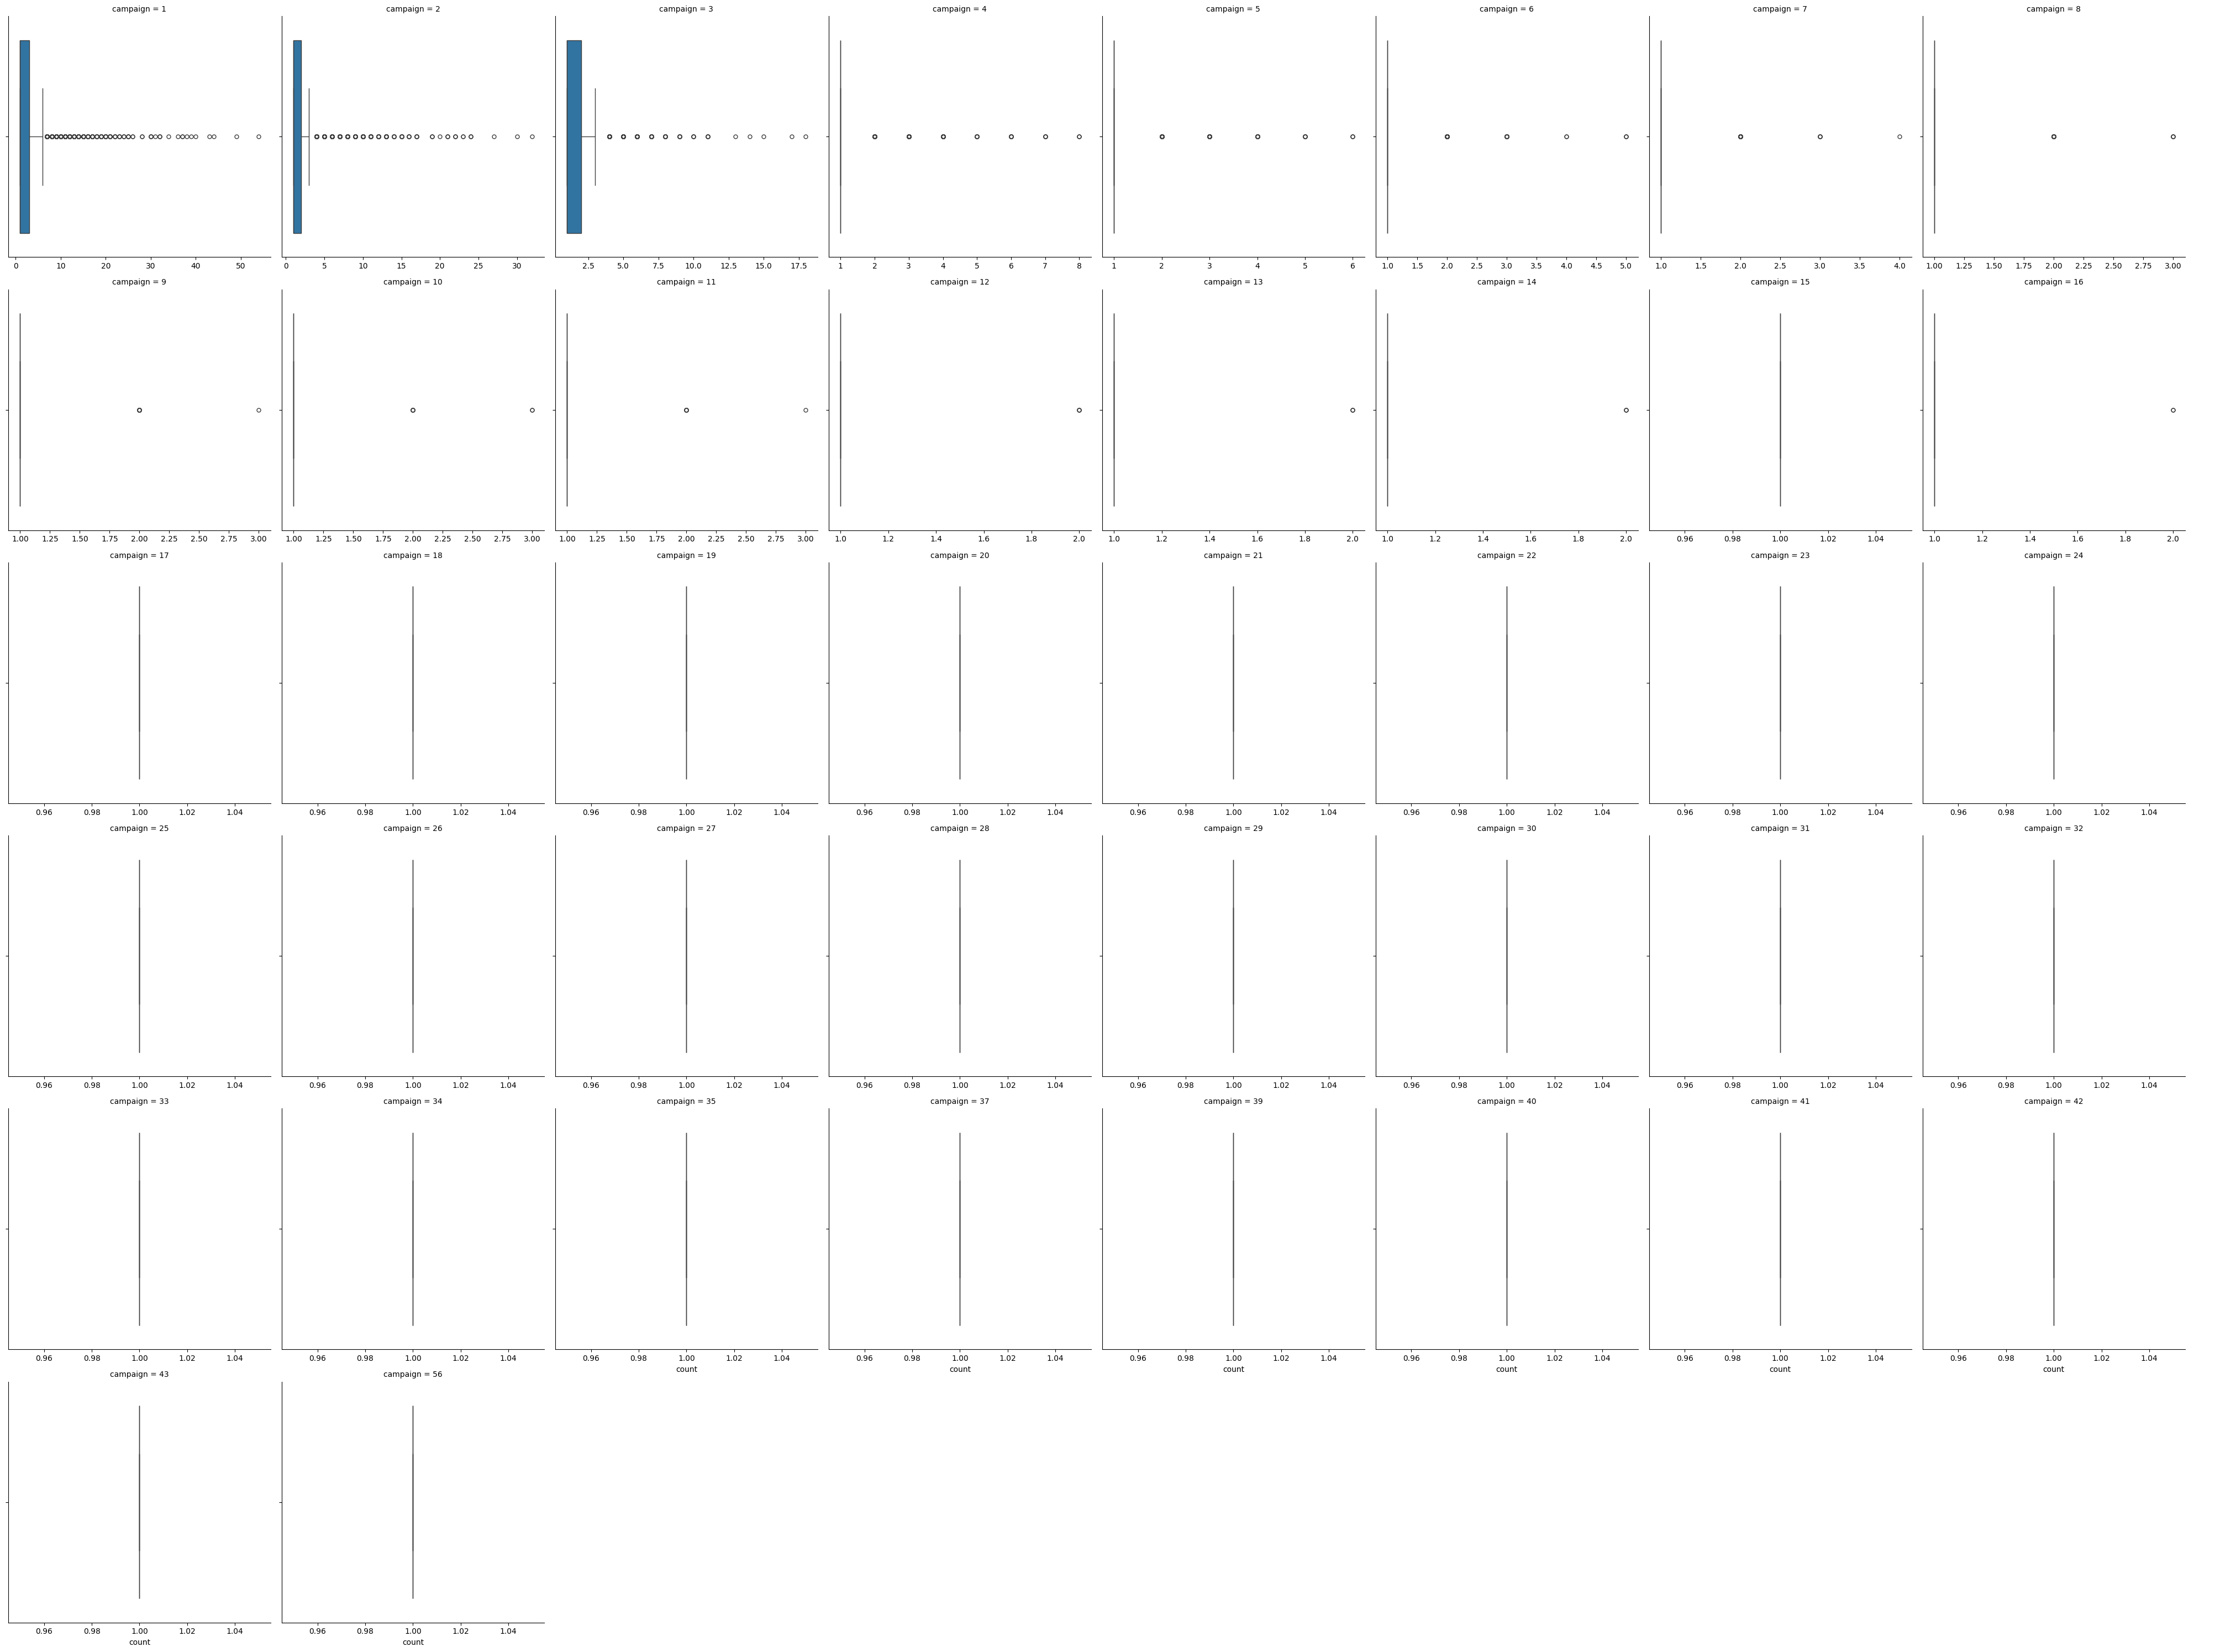

In [ ]:
sns.catplot(data = campaign_engagement,
            x= "count",
            kind="box",
            col="campaign", # drawing each campaign into 1 plot
            col_wrap=8, # creating 4 columns
            sharex=False   #to make each graph not to share x axis scale
            # showfliers=False
            )

plt.show()